import libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [17]:
## load data
bank = pd.read_csv("bank-full.csv",sep = ';')

In [18]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


- here our target column is y weather the person got term deposite or not 
- whenever our target column is catogry or class at that time our problem is classification problem or else whernever target column is numeric then that's regression problem

# EDA

In [19]:
bank.shape

(45211, 17)

In [20]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


from the describe we can see that in balance, duration and campaign pdays and preious there is outlier

In [21]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

there's is no null value

In [22]:
bank.duplicated().sum()

0

there's is no duplicated value

In [23]:
age1=bank["age"].sort_values()

In [24]:
age1

42954    18
41273    18
42146    18
43637    18
40736    18
         ..
44420    93
44262    93
31233    94
41663    95
33699    95
Name: age, Length: 45211, dtype: int64

by sort_values we check age of the person as you can see the person age start from 18 to 95

In [25]:
## for getting columns names
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [26]:
## getting information about data
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


we can drop the column which is not related to our target columns or else drop all catogry column 

In [27]:
## droping the irrelevent columns 
bank.drop(["job","marital","education","housing","loan","contact","day","month","poutcome","default"],axis = 1,inplace = True)

In [28]:
bank.head()

,age,balance,duration,campaign,pdays,previous,y
0,58,2143,261,1,-1,0,no
1,44,29,151,1,-1,0,no
2,33,2,76,1,-1,0,no
3,47,1506,92,1,-1,0,no
4,33,1,198,1,-1,0,no


In [29]:
bank.describe()

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [30]:
bank.duplicated().sum()

64

In [31]:
bank.drop_duplicates(inplace = True)

In [32]:
bank.duplicated().sum()

0

# visualization

/var/folders/2h/pvydj3gx0qq7gw6mjph10fkc0000gn/T/ipykernel_12075/4215587009.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bank.corr(), annot = True)


<Axes: >

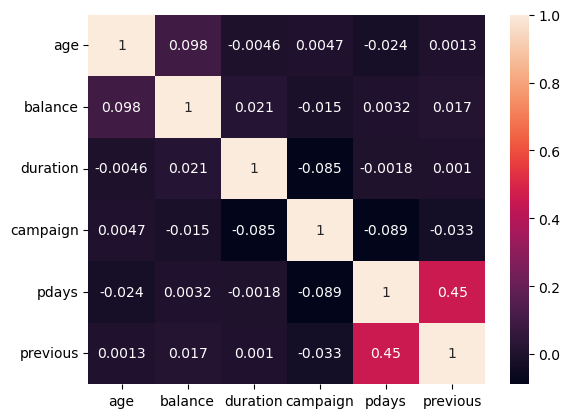

In [33]:
sns.heatmap(bank.corr(), annot = True)

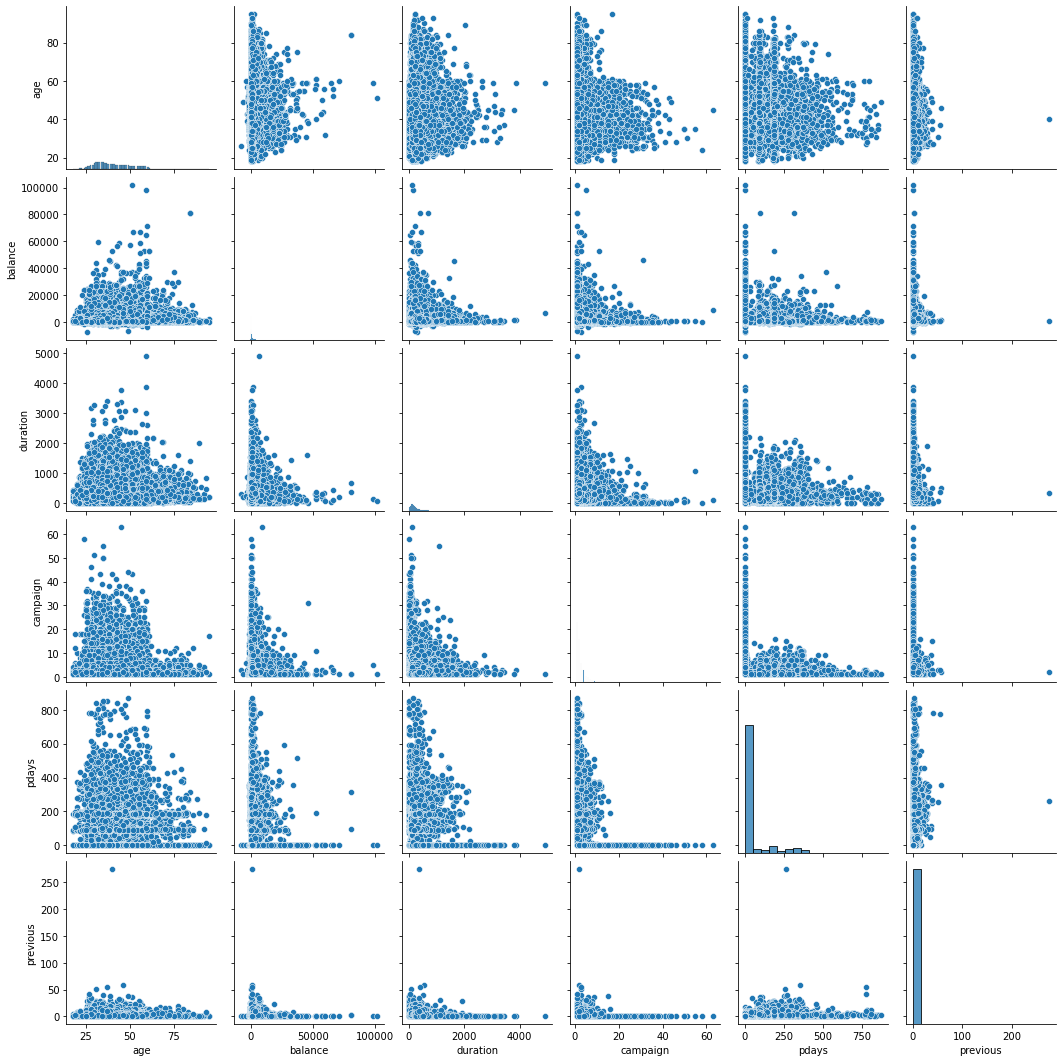

In [9]:
sns.pairplot(bank)

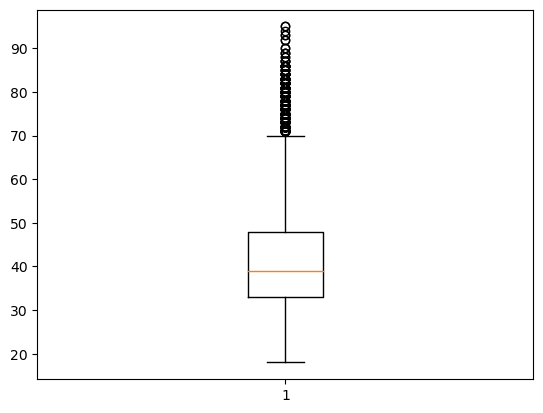

In [34]:
## checking the outliers 
box = plt.boxplot(bank["age"])

we can't drop outliers because its age and its continue to 95 as you can see above

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe1f6b8d8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe1f6b8de20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe1f6b6b760>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe1f6b9f3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe1f6b9f640>],
 'means': []}

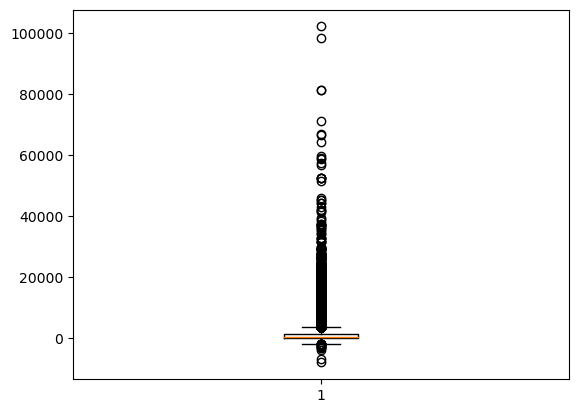

In [35]:
 plt.boxplot(bank["balance"])

same here also its balance and person can invest how much money they have so we can't drop that outliers

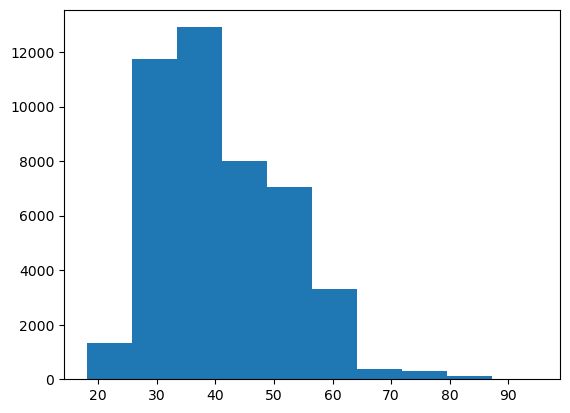

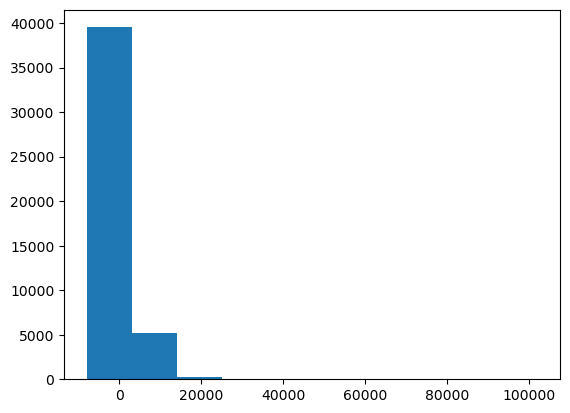

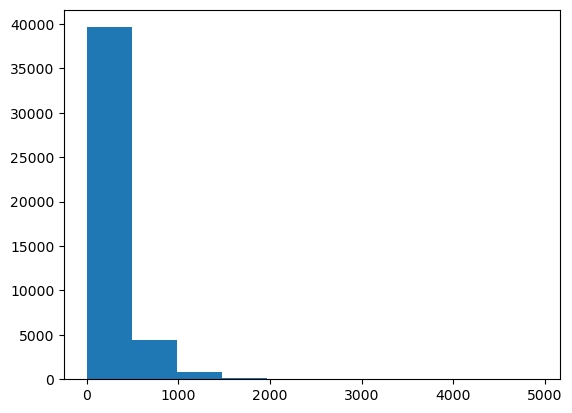

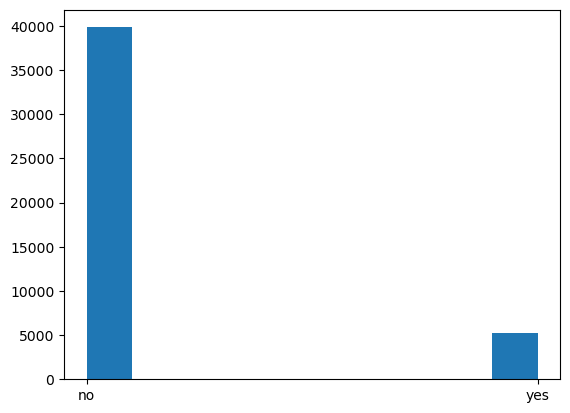

In [36]:
plt.figure("histogram for age ")
plt.hist(bank["age"])
plt.figure("histogram for balance")
plt.hist(bank["balance"])
plt.figure("histogram for duration")
plt.hist(bank["duration"])
plt.figure("histogram for y")
plt.hist(bank["y"])
plt.show()

# converting target column object to numeric

In [38]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [39]:
bank['y']= label_encoder.fit_transform(bank['y'])

In [40]:
bank.head()

,age,balance,duration,campaign,pdays,previous,y
0,58,2143,261,1,-1,0,0
1,44,29,151,1,-1,0,0
2,33,2,76,1,-1,0,0
3,47,1506,92,1,-1,0,0
4,33,1,198,1,-1,0,0


In [42]:
bank["y"].value_counts()

0    39858
1     5289
Name: y, dtype: int64

our target column is not balance 

# divide data into x and y

In [43]:
x = bank.drop(["y"],axis = 1)
y = bank.iloc[:,-1]

In [44]:
x

,age,balance,duration,campaign,pdays,previous
0,58,2143,261,1,-1,0
1,44,29,151,1,-1,0
2,33,2,76,1,-1,0
3,47,1506,92,1,-1,0
4,33,1,198,1,-1,0
...,...,...,...,...,...,...
45206,51,825,977,3,-1,0
45207,71,1729,456,2,-1,0
45208,72,5715,1127,5,184,3
45209,57,668,508,4,-1,0


In [45]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [46]:
## spliting my data into test and train 
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [47]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape


((31602, 6), (31602,), (13545, 6), (13545,))

In [48]:
Y_train.value_counts()

0    27934
1     3668
Name: y, dtype: int64

(array([39858.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5289.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

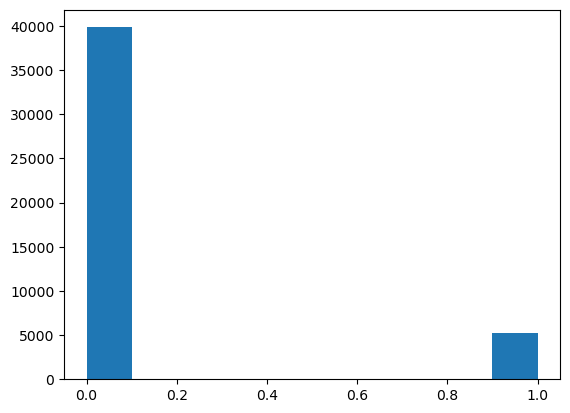

In [49]:
plt.hist(bank["y"])

## our target column is not balance for that we use somte function 




In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
sm = SMOTE(random_state = 2)

In [53]:
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [54]:
Y_train.value_counts()

0    27934
1    27934
Name: y, dtype: int64

# Logistic regression

In [70]:
classifier = LogisticRegression(max_iter=200,random_state=42)

In [71]:
classifier.fit(X_train,Y_train,)

LogisticRegression(max_iter=200, random_state=42)

In [72]:
## predict for x dataset
y_pred = classifier.predict(X_test)

In [73]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted_prob': classifier.predict(x),
                         "p_0" : [X[0] for X in classifier.predict_proba(x)],
                         'p_1':[X[1] for X in classifier.predict_proba(x)]})

In [74]:
y_pred_df

,actual,predicted_prob,p_0,p_1
0,0,0,0.531533,0.468467
1,0,0,0.700903,0.299097
2,0,0,0.779104,0.220896
3,0,0,0.736953,0.263047
4,0,0,0.661324,0.338676
...,...,...,...,...
45206,1,1,0.066710,0.933290
45207,1,1,0.366510,0.633490
45208,1,1,0.019258,0.980742
45209,0,1,0.479400,0.520600


In [75]:
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [76]:
classifier.score(X_train,Y_train)

0.7525059067802677

In [77]:
classifier.score(X_test,Y_test)

0.7825027685492801

In [101]:
## confusion metrix for the model
from sklearn.metrics import confusion_matrix


In [79]:
confusion_matrix = confusion_matrix(Y_test,y_pred)

In [80]:
print(confusion_matrix)

[[9505 2419]
 [ 527 1094]]


In [81]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     11924
           1       0.31      0.67      0.43      1621

    accuracy                           0.78     13545
   macro avg       0.63      0.74      0.65     13545
weighted avg       0.87      0.78      0.81     13545



In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Text(0, 0.5, 'True Positive Rate')

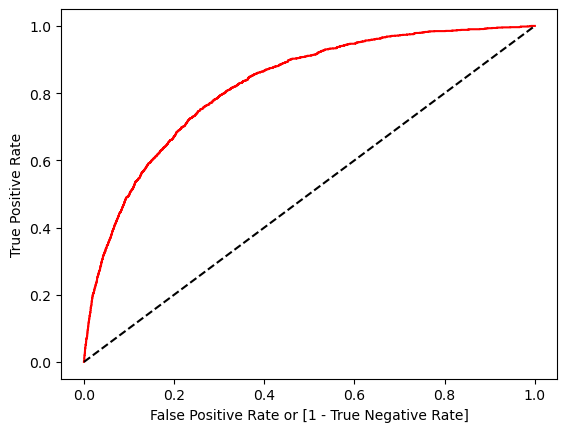

In [84]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y_test,classifier.predict_proba (X_test)[:,1])

auc = roc_auc_score(Y_test,y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
